In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
font = {
    'size': 15
}
matplotlib.rc('font', **font)

In [89]:
base_dataset = pd.read_csv('../data/gedevents-2022-02-02.csv', index_col=False)

In [90]:
base_dataset = base_dataset[
    base_dataset['year'] >= 2000
]
columns_to_keep = [
    'country', 'year', 'type_of_violence', 'best_est'
]
base_dataset = base_dataset[columns_to_keep]

In [91]:
food_insecurity_df = pd.read_csv('../data/final_dataset.csv')
food_insecurity_df = food_insecurity_df[
    (food_insecurity_df["Country"].isin(["India", "Indonesia"]))
    & (food_insecurity_df["Year"].between(2000, 2019))
][["Country", "Year", "UndernourishedPercent"]]
food_insecurity_df

,Country,Year,UndernourishedPercent
5450,Indonesia,2000,NaN
5451,Indonesia,2001,19.2
5452,Indonesia,2002,19.1
5453,Indonesia,2003,18.9
5454,Indonesia,2004,19.1
5455,Indonesia,2005,19.2
5456,Indonesia,2006,19
5457,Indonesia,2007,18.5
5458,Indonesia,2008,17.4
5459,Indonesia,2009,15.5


In [92]:
base_dataset

,country,year,type_of_violence,best_est
0,India,2000,1,3
3,India,2003,1,2
4,India,2012,1,1
5,India,2003,1,1
6,India,2003,1,2
...,...,...,...,...
17413,India,2019,1,3
17414,India,2019,1,1
17415,India,2019,1,2
17416,India,2019,1,1


In [93]:
bins = np.arange(1999, 2021, 5)
cumulative_conflicts = base_dataset.groupby(['country', 'type_of_violence', pd.cut(base_dataset.year, bins)]).sum().drop('year', axis=1)

In [94]:
cumulative_conflicts

best_est
country   type_of_violence year                  
India     1                (1999, 2004]      8861
                           (2004, 2009]      6357
                           (2009, 2014]      2952
                           (2014, 2019]      3286
          2                (1999, 2004]       339
                           (2004, 2009]       366
                           (2009, 2014]       263
                           (2014, 2019]        14
          3                (1999, 2004]      3404
                           (2004, 2009]      2636
                           (2009, 2014]      1461
                           (2014, 2019]       620
Indonesia 1                (1999, 2004]      2834
                           (2004, 2009]       228
                           (2009, 2014]        32
                           (2014, 2019]        42
          2                (1999, 2004]      1075
                           (2004, 2009]         0
                           (2009, 2014]         7
                           (2014, 2019]         0
          3                (1999, 2004]       754
                           (2004, 2009]        35
                           (2009, 2014]         3
                           (2014, 2019]        11

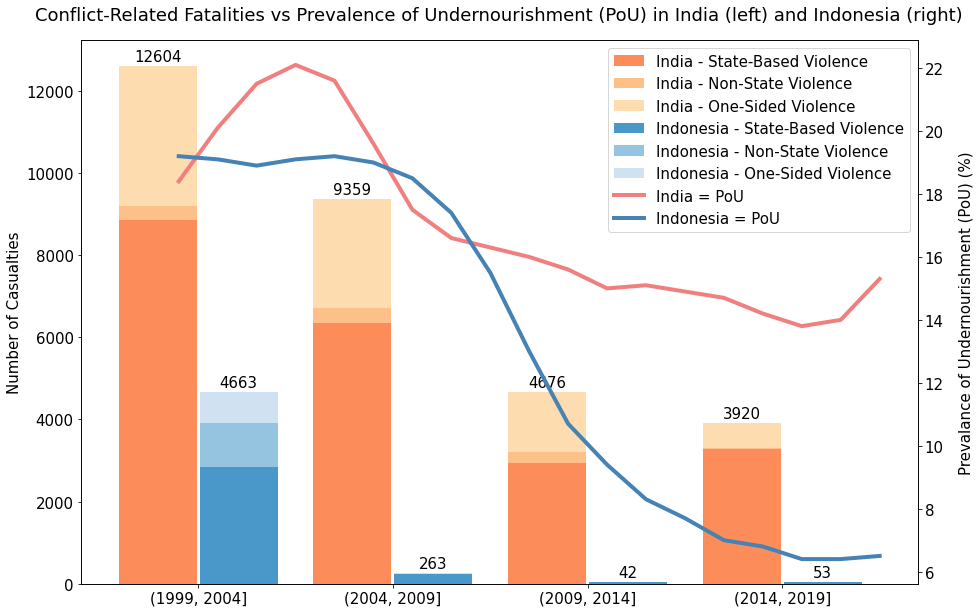

In [122]:
x_labels = cumulative_conflicts.index.unique(level='year').values.astype(str)
x_axis_1 = np.asarray([2001.5, 2006.5, 2011.5, 2016.5])
x_axis_2 = np.arange(2000, 2020, 1)
width = 2

fig, ax = plt.subplots(figsize=(15, 10))
y_axis_india_1 = cumulative_conflicts.loc['India', 1]['best_est'].values
y_axis_india_2 = cumulative_conflicts.loc['India', 2]['best_est'].values
y_axis_india_3 = cumulative_conflicts.loc['India', 3]['best_est'].values
y_axis_indonesia_1 = cumulative_conflicts.loc['Indonesia', 1]['best_est'].values
y_axis_indonesia_2 = cumulative_conflicts.loc['Indonesia', 2]['best_est'].values
y_axis_indonesia_3 = cumulative_conflicts.loc['Indonesia', 3]['best_est'].values

colors_indonesia = plt.cm.Blues(np.linspace(0.2, 0.6, 3))
colors_india = plt.cm.OrRd(np.linspace(0.2, 0.5, 3))

alpha_bar = 1
plt1 = ax.bar(x_axis_1 - 0.52*width, y_axis_india_1, width, label="India - State-Based Violence", alpha=alpha_bar, color=colors_india[2])
plt2 = ax.bar(x_axis_1 - 0.52*width, y_axis_india_2, width, bottom = y_axis_india_1, label="India - Non-State Violence", alpha=alpha_bar, color=colors_india[1])
plt3 = ax.bar(x_axis_1 - 0.52*width, y_axis_india_3, width, bottom = y_axis_india_1 + y_axis_india_2, label="India - One-Sided Violence", alpha=alpha_bar, color=colors_india[0])
plt4 = ax.bar(x_axis_1 + 0.52*width, y_axis_indonesia_1, width, label="Indonesia - State-Based Violence", alpha=alpha_bar, color=colors_indonesia[2])
plt5 = ax.bar(x_axis_1 + 0.52*width, y_axis_indonesia_2, width, bottom = y_axis_indonesia_1, label="Indonesia - Non-State Violence", alpha=alpha_bar, color=colors_indonesia[1])
plt6 = ax.bar(x_axis_1 + 0.52*width, y_axis_indonesia_3, width, bottom = y_axis_indonesia_1 + y_axis_indonesia_2, label="Indonesia - One-Sided Violence", alpha=alpha_bar, color=colors_indonesia[0])


ax.bar_label(plt3, padding = 2)
ax.bar_label(plt6, padding = 2)

ax.set_ylabel("Number of Casualties")
# ax.set_xlabel("Timeline (left: India, right: Indonesia)")
plt.xticks(x_axis_1, x_labels)

ax2 = ax.twinx()
ax2.set_ylabel('Prevalance of Undernourishment (PoU) (%)', labelpad=15)

india_undernourished = food_insecurity_df[food_insecurity_df["Country"] == "India"]
indonesia_undernourished = food_insecurity_df[food_insecurity_df["Country"] == "Indonesia"]

line_width = 4
plt7 = ax2.plot(x_axis_2, india_undernourished["UndernourishedPercent"], label="India = PoU", linewidth=line_width, color = 'lightcoral')
plt8 = ax2.plot(x_axis_2, indonesia_undernourished["UndernourishedPercent"], label="Indonesia = PoU", linewidth=line_width, color = 'steelblue')#, marker='x')

# Processing for legend
lns = [plt1] + [plt2] + [plt3] + [plt4] + [plt5] + [plt6] + plt7 + plt8
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)
plt.title('Conflict-Related Fatalities vs Prevalence of Undernourishment (PoU) in India (left) and Indonesia (right)', pad=20)
plt.show()


In [ ]:
aggregated_dataset

In [ ]:
# x_labels = cumulative_conflicts.index.unique(level='year').values.astype(str)
x_axis = np.arange(2000, 2020, 1)

width = 0.5

def add_missing_years(years, data):
    # data will have index as year
    missing_years = list(set(years) - set(data.index.values))
    for year in missing_years:
        data[year] = 0
    return data.sort_index()


fig, ax = plt.subplots(figsize=(15, 10))
y_axis_india_1 = add_missing_years(x_axis, aggregated_dataset.loc['India', 1]['best_est'])
y_axis_india_2 = add_missing_years(x_axis, aggregated_dataset.loc['India', 2]['best_est'])
y_axis_india_3 = add_missing_years(x_axis, aggregated_dataset.loc['India', 3]['best_est'])
y_axis_indonesia_1 = add_missing_years(x_axis, aggregated_dataset.loc['Indonesia', 1]['best_est'])
y_axis_indonesia_2 = add_missing_years(x_axis, aggregated_dataset.loc['Indonesia', 2]['best_est'])
y_axis_indonesia_3 = add_missing_years(x_axis, aggregated_dataset.loc['Indonesia', 3]['best_est'])

plt1 = ax.bar(x_axis - 0.5*width, y_axis_india_1, width, label="India - State-Based Violence")
plt2 = ax.bar(x_axis - 0.5*width, y_axis_india_2, width, bottom = y_axis_india_1, label="India - Non-State Violence")
plt3 = ax.bar(x_axis - 0.5*width, y_axis_india_3, width, bottom = y_axis_india_1 + y_axis_india_2, label="India - One-Sided Violence")
plt4 = ax.bar(x_axis + 0.5*width, y_axis_indonesia_1, width, label="Indonesia - State-Based Violence")
plt5 = ax.bar(x_axis + 0.5*width, y_axis_indonesia_2, width, bottom = y_axis_indonesia_1, label="Indonesia - Non-State Violence")
plt6 = ax.bar(x_axis + 0.5*width, y_axis_indonesia_3, width, bottom = y_axis_indonesia_1 + y_axis_indonesia_2, label="Indonesia - One-Sided Violence")

# plt.bar_label(plt1, padding = 2)
# plt.bar_label(plt2, padding = 2)
# ax.bar_label(plt3, padding = 2)
# plt.bar_label(plt4, padding = 2)
# plt.bar_label(plt5, padding = 2)
# ax.bar_label(plt6, padding = 2)

# ax.set_ylabel("Number of Casualties")
# ax.set_xlabel("Timeline (left: India, right: Indonesia)")
# plt.xticks(x_axis, x_labels)

# ax2 = ax.twinx()
# ax.legend()
plt.show()
# y_axis

In [ ]:
""